## Gaussian Process Regression

### Example 1: Simple case with no noise.

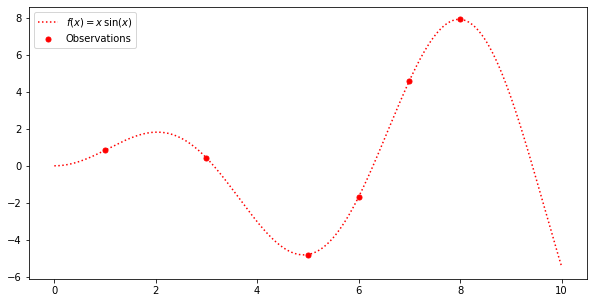

In [1]:
# This example of Gaussian Process Regression is borrowed from:
#
# Author: Vincent Dubourg <vincent.dubourg@gmail.com>
#         Jake Vanderplas <vanderplas@astro.washington.edu>
#         Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>s
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel,WhiteKernel
np.random.seed(1)

def f(x):
    return x * np.sin(x)

x_obs = np.array([1.,3.,5.,6.,7.,8.]).reshape(-1,1)
y_obs = f(x_obs).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x_mesh = np.linspace(0,10,1000).reshape(-1,1)
y_mesh = f(x_mesh)

fig = plt.figure(figsize=(10,5))
plt.plot(x_mesh, f(x_mesh), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(x_obs, y_obs, 'r.', markersize=10, label=u'Observations')
plt.legend()
plt.show()

http://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html

The RBF kernel is a stationary kernel. It is also known as the “squared exponential” kernel. It is parameterized by a length-scale parameter length_scale>0, which can either be a scalar (isotropic variant of the kernel) or a vector with the same number of dimensions as the inputs X (anisotropic variant of the kernel). The isotropic kernel is given by:

$k(x_i, x_j) = e^{-\frac{1}{2} D\left(\frac{x_i}{lengthScale}, \frac{x_j}{lengthScale}\right)^2}$, where $D$ is Euclidean distance.

For the anisotropic kernel, each component $k$ of $x_i$ and $x_j$ is divided by $lengthScale$ before computing the squared distance in that dimension. 

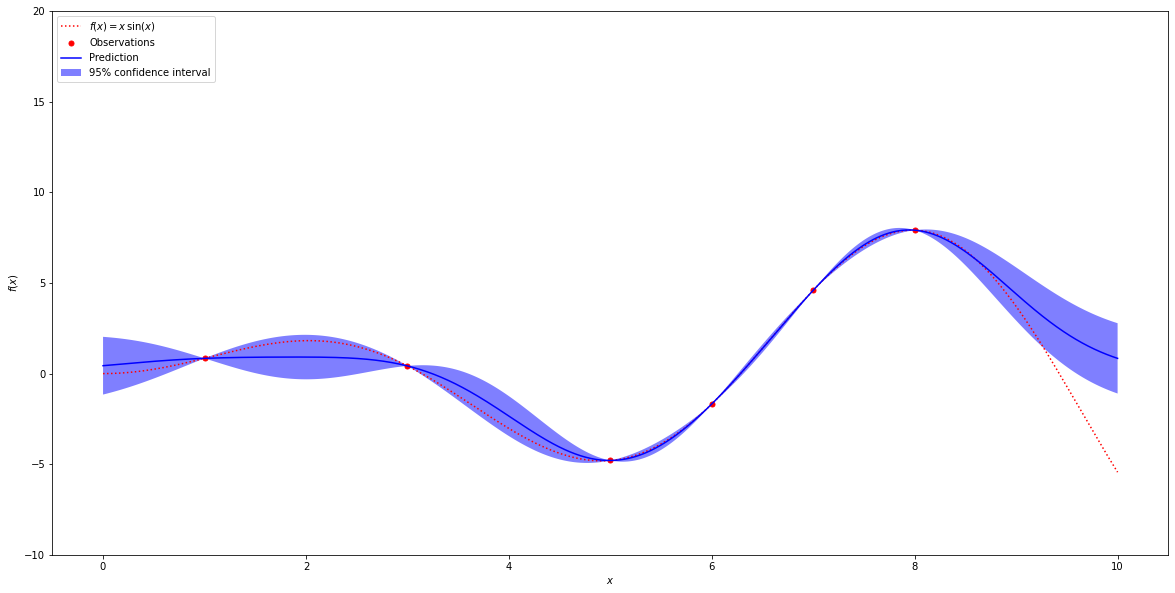

-48.834271451869526
RBF(length_scale=0.957)


In [2]:
# Instantiate a Gaussian Process model with a radial basis function kernel.
kernel = RBF(1., (0.1, 10.)) # parameters of RBF kernel: length_scale, (length_scale_range_min, length_scale_range_max)
gp = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Fit to data using maximum likelihood estimation of the parameters
gp.fit(x_obs, y_obs)

# Make the prediction on the meshed x-axis (mean and standard deviation)
y_mesh_pred, sigma = gp.predict(x_mesh, return_std=True)

# Plot the function, the prediction and the 95% confidence interval
fig = plt.figure(figsize=(20,10))
plt.plot(x_mesh, y_mesh, 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(x_obs, y_obs, 'r.', markersize=10, label=u'Observations')
plt.plot(x_mesh, y_mesh_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x_mesh, x_mesh[::-1]]),
         np.concatenate([y_mesh_pred - 1.9600 * sigma,
                        (y_mesh_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')
plt.show()

print(gp.log_marginal_likelihood_value_)
print(gp.kernel_)

C:\Users\Jeff\anaconda3\envs\ds\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


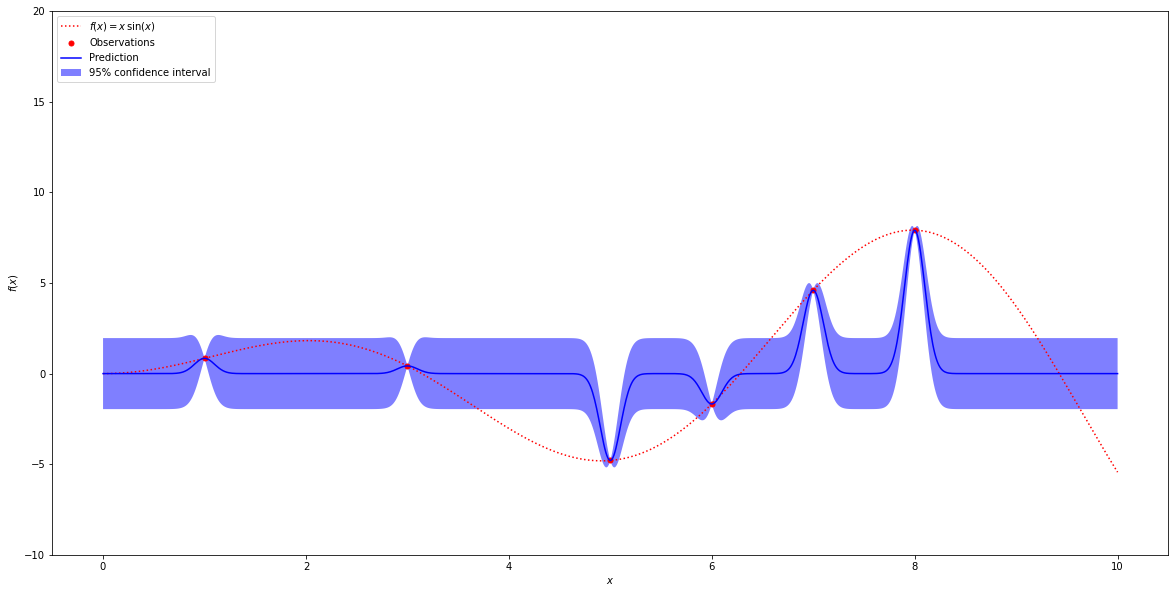

-60.75431694844103
RBF(length_scale=0.1)


In [3]:
# What happens if the kernel bandwidth is too small or too large?
# Try RBF(0.1,(0.1,0.1)) and RBF(10.,(10.,10.))
# This is one reason why we like to specify a range of bandwidths and let RBF pick a good one.

# Instantiate a Gaussian Process model with a radial basis function kernel.
kernel = RBF(0.1, (0.1, 0.1)) # parameters of RBF kernel: length_scale, (length_scale_range_min, length_scale_range_max)
#kernel = RBF(10., (10., 10.)) # parameters of RBF kernel: length_scale, (length_scale_range_min, length_scale_range_max)
gp = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Fit to data using maximum likelihood estimation of the parameters
gp.fit(x_obs, y_obs)

# Make the prediction on the meshed x-axis (mean and standard deviation)
y_mesh_pred, sigma = gp.predict(x_mesh, return_std=True)

# Plot the function, the prediction and the 95% confidence interval
fig = plt.figure(figsize=(20,10))
plt.plot(x_mesh, y_mesh, 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(x_obs, y_obs, 'r.', markersize=10, label=u'Observations')
plt.plot(x_mesh, y_mesh_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x_mesh, x_mesh[::-1]]),
         np.concatenate([y_mesh_pred - 1.9600 * sigma,
                        (y_mesh_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')
plt.show()

print(gp.log_marginal_likelihood_value_)
print(gp.kernel_)

### Example 2. Let's try a more difficult example with added noise.

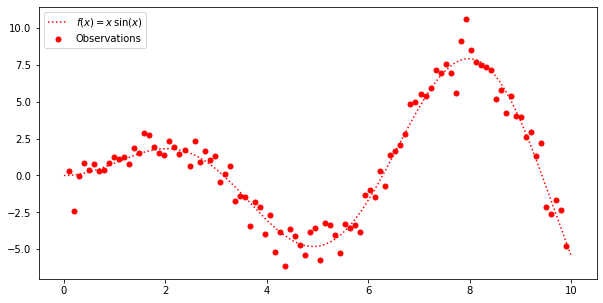

In [4]:
np.random.seed(1)
x_obs = np.linspace(0.1, 9.9, 100).reshape(-1,1)
y_obs = f(x_obs).ravel()

# add noise
dy = 0.5 + 1.0 * np.random.random(y_obs.shape)
noise = np.random.normal(0, dy)
y_obs += noise

# plot
fig = plt.figure(figsize=(10,5))
plt.plot(x_mesh, y_mesh, 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(x_obs, y_obs, 'r.', markersize=10, label=u'Observations')
plt.legend(loc='upper left')
plt.show()

### a) Using RBF without adding white noise kernel

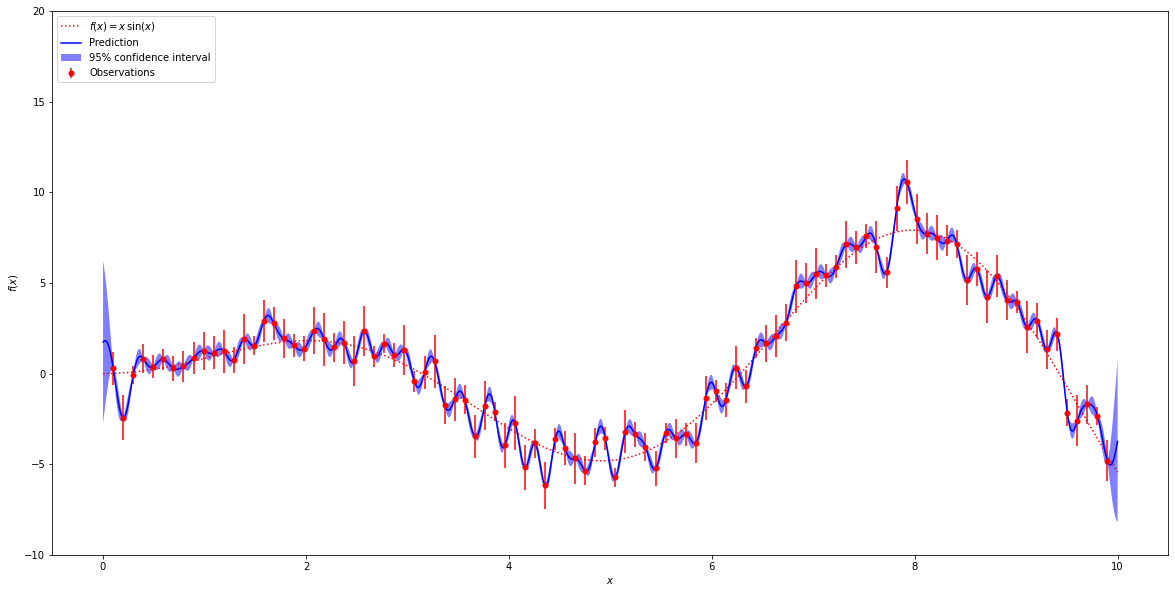

In [5]:
# Instantiate a Gaussian Process model.

# Note: specifying 1.*RBF(...) instead of RBF() will allow it to fit a constant multiplicative factor as well.
# Without it, performance is even worse in this example!
kernel = 1.*RBF(1., (0.1, 10.))
gp = GaussianProcessRegressor(kernel=kernel,random_state=1)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(x_obs, y_obs)

y_mesh_pred, sigma = gp.predict(x_mesh, return_std=True)

# Plot the function, the prediction and the 95% confidence interval
fig = plt.figure(figsize=(20,10))
plt.plot(x_mesh, y_mesh, 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.errorbar(x_obs.ravel(), y_obs, dy, fmt='r.', markersize=10, label=u'Observations')
plt.plot(x_mesh, y_mesh_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x_mesh, x_mesh[::-1]]),
         np.concatenate([y_mesh_pred - 1.9600 * sigma,
                        (y_mesh_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')
plt.show()

In [6]:
gp.log_marginal_likelihood_value_

-223.96812335750684

In [7]:
gp.kernel_

3.24**2 * RBF(length_scale=0.1)

### b) Adding whiteKernel to model noisy data

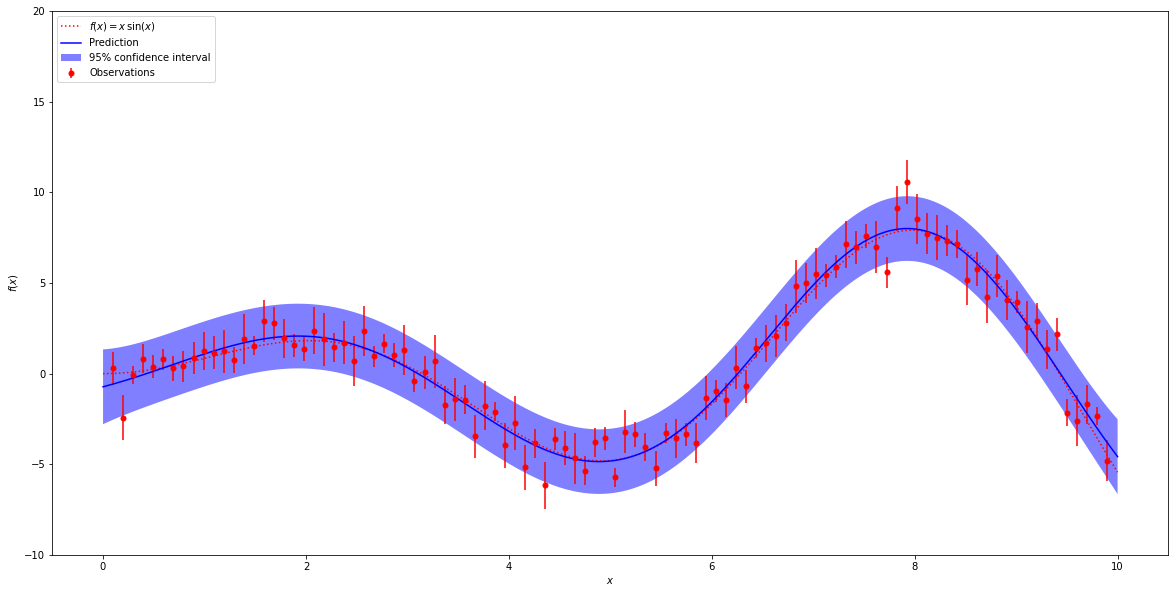

In [8]:
kernel = 1.* RBF(length_scale=1., length_scale_bounds=(1e-3, 1e3)) \
    + WhiteKernel(noise_level=1., noise_level_bounds=(1e-10, 1e10))

gp = GaussianProcessRegressor(kernel=kernel,random_state=1)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(x_obs, y_obs)

y_mesh_pred, sigma = gp.predict(x_mesh, return_std=True)

# Plot the function, the prediction and the 95% confidence interval
fig = plt.figure(figsize=(20,10))
plt.plot(x_mesh, y_mesh, 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.errorbar(x_obs.ravel(), y_obs, dy, fmt='r.', markersize=10, label=u'Observations')
plt.plot(x_mesh, y_mesh_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x_mesh, x_mesh[::-1]]),
         np.concatenate([y_mesh_pred - 1.9600 * sigma,
                        (y_mesh_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')
plt.show() 


In [9]:
print(gp.log_marginal_likelihood_value_)
print(gp.kernel_)

-150.03885576207173
6.87**2 * RBF(length_scale=1.93) + WhiteKernel(noise_level=0.776)


### c) Prediction

We observe that the uncertainty in our predictions increases as we move away from the observed data points.

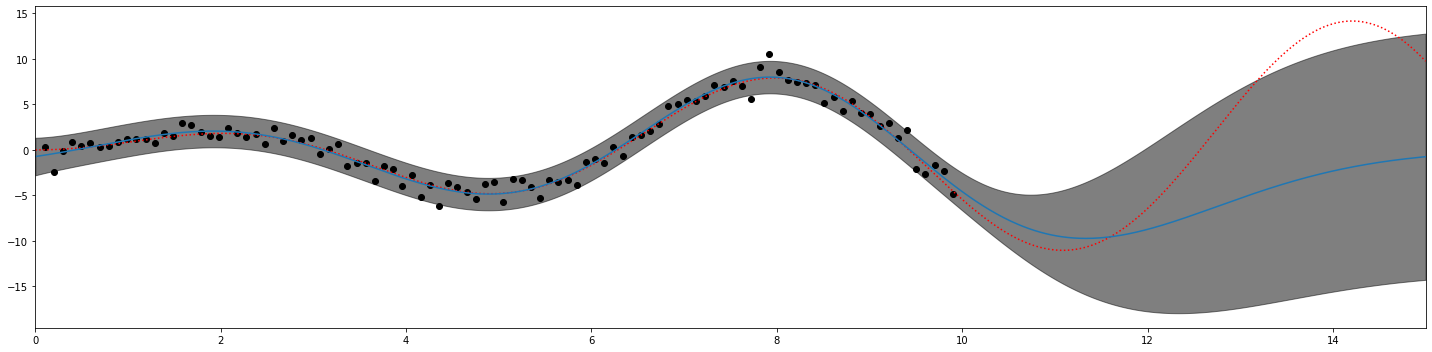

In [10]:
x_mesh_2 = np.linspace(x_mesh.min(), x_mesh.max() + 5, 1000)[:, np.newaxis]
y_mesh_2_pred, y_mesh_2_std = gp.predict(x_mesh_2, return_std=True)

# Plot
plt.figure(figsize=(20,5))
plt.scatter(x_obs, y_obs, c='k')
plt.plot(x_mesh_2, f(x_mesh_2), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(x_mesh_2, y_mesh_2_pred)
plt.fill_between(x_mesh_2[:, 0], y_mesh_2_pred - 1.96*y_mesh_2_std, y_mesh_2_pred + 1.96*y_mesh_2_std,
                 alpha=0.5, color='k')
plt.xlim(x_mesh_2.min(), x_mesh_2.max())
plt.tight_layout()
plt.show()

## Practice #1: Long-range time series prediction

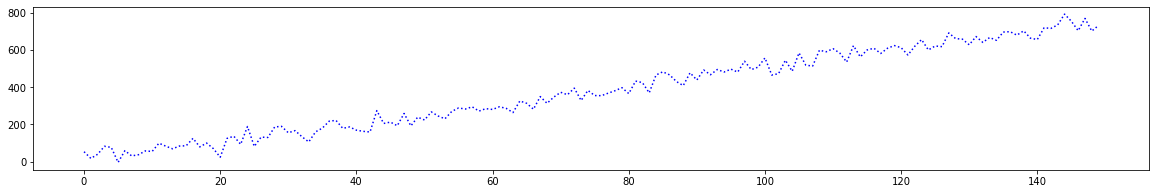

In [11]:
np.random.seed(0)
dy=np.random.randn(150)
y=5*np.asarray(range(150))+dy*30
x=np.asarray(range(150))
plt.figure(figsize=(20,3))
plt.plot(y,"b:")
plt.show()

In [12]:
x_train=x[:100]
x_test=x[100:]
y_train=y[:100]
y_test=y[100:]

### Try to model y using x.

#### Part 1. Try using an RBF kernel without whiteKernel. What are the parameters learned from the training data? Plot the predictions for both training and testing data together using the trained model. 

145**2 * RBF(length_scale=0.01)


C:\Users\Jeff\anaconda3\envs\ds\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


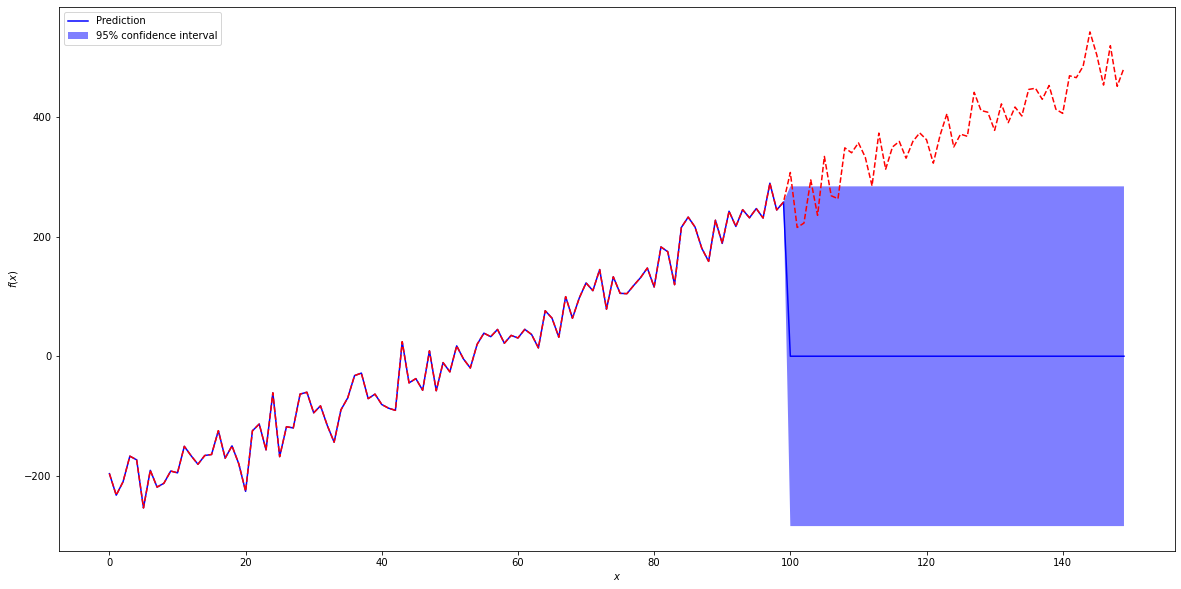

In [13]:
kernel = 1. * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

gp = GaussianProcessRegressor(kernel=kernel,random_state=1)

# Fit to training data using Maximum Likelihood Estimation of the parameters
gp.fit(x_train.reshape(-1,1),y_train-y_train.mean())
print(gp.kernel_)

# Predict for the whole dataset (training and test)
y_pred, sigma = gp.predict(x.reshape(-1,1), return_std=True)

# Plot the function, the prediction and the 95% confidence interval
fig = plt.figure(figsize=(20,10))
plt.plot(range(150), y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([range(150), range(150)[::-1]]),
        np.concatenate([y_pred - 1.9600 * sigma,
        (y_pred + 1.9600 * sigma)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.plot(y-y_train.mean(),"r--")
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='upper left')
plt.show()

In [14]:
print(gp.log_marginal_likelihood_value_)

-639.4952224085746


#### Part 2: Repeat this process using RBF kernel + whiteKernel.

C:\Users\Jeff\anaconda3\envs\ds\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Jeff\anaconda3\envs\ds\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


316**2 * RBF(length_scale=100) + WhiteKernel(noise_level=804)


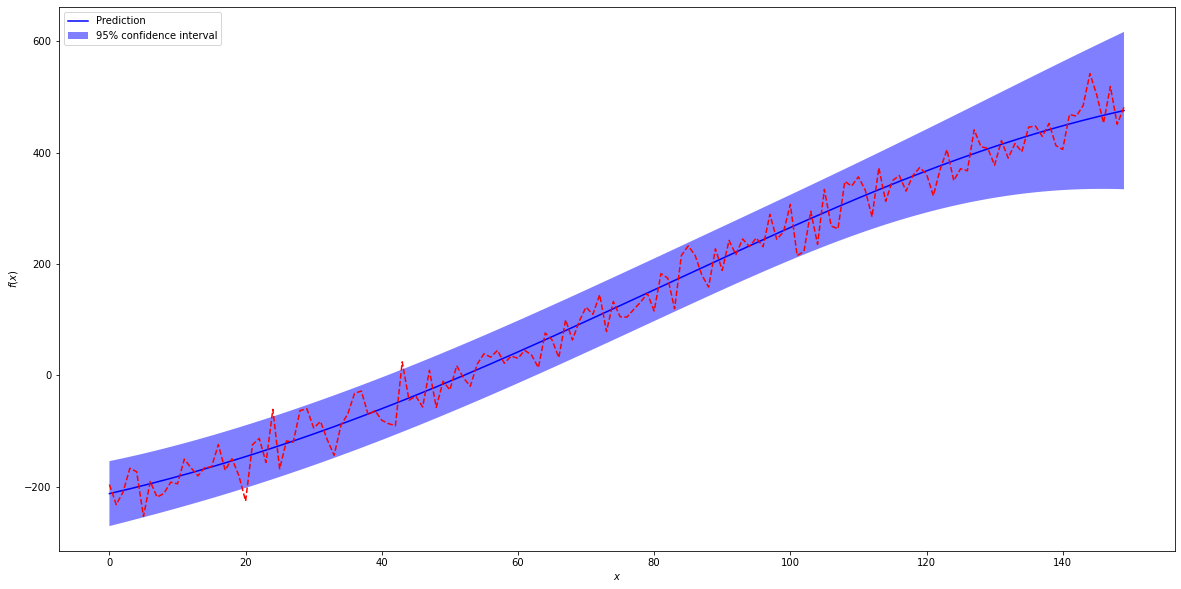

In [15]:
kernel = 1. * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e10))

gp = GaussianProcessRegressor(kernel=kernel,random_state=1)

# Fit to training data using Maximum Likelihood Estimation of the parameters
gp.fit(x_train.reshape(-1,1),y_train-y_train.mean())
print(gp.kernel_)

# Predict for the whole dataset (training and test)
y_pred, sigma = gp.predict(x.reshape(-1,1), return_std=True)

# Plot the function, the prediction and the 95% confidence interval
fig = plt.figure(figsize=(20,10))
plt.plot(range(150), y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([range(150), range(150)[::-1]]),
        np.concatenate([y_pred - 1.9600 * sigma,
        (y_pred + 1.9600 * sigma)[::-1]]),
        alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.plot(y-y_train.mean(),"r--")
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='upper left')
plt.show()

### Example 3: Modeling data with cyclical trends.  The data represents the number of international airline passengers, in thousands, by month from January 1949 through December 1960.  We are going to make long-range predictions for the last 64 months of data using the first 80 months for training.

To do so, we are going to engineer a kernel which should capture all the different trends in the data, including:

1) Long term, smooth rising trend: model by an RBF kernel with a long length scale

2) Seasonal component: model by the product of an RBF kernel (with a long length scale) and a periodic kernel (ExpSineSquared), with periodicity fixed to a 12-month cycle.

3) Medium term irregularities: model by a RationalQuadratic kernel

4) Noise terms: model by a whiteKernel

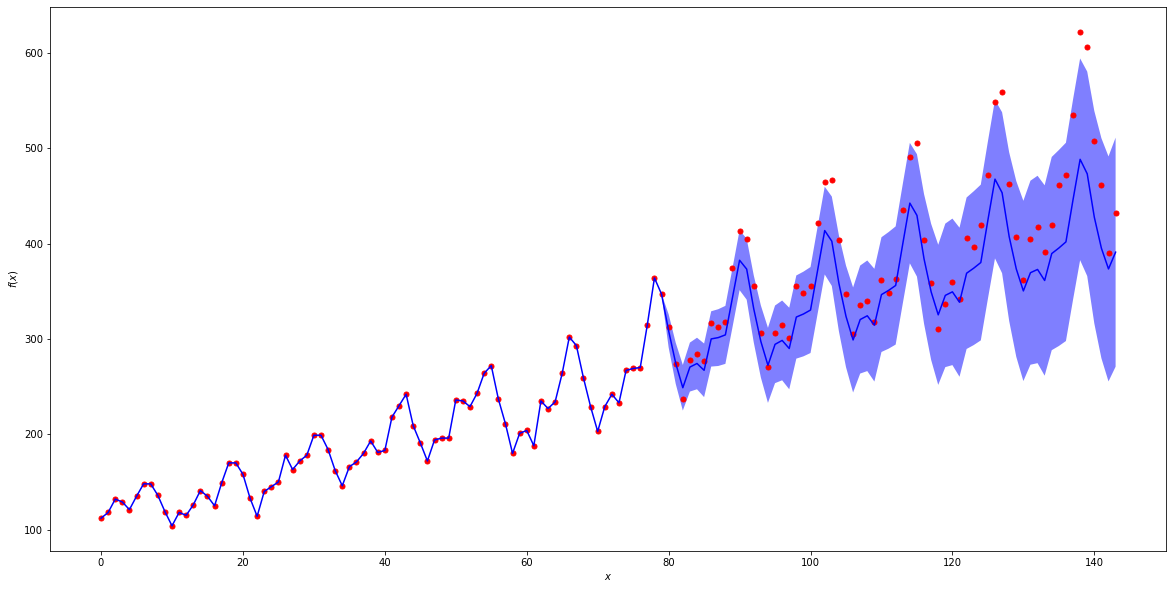

-304.47328895973885
264**2 * RBF(length_scale=144) + 32.2**2 * RBF(length_scale=92.6) * ExpSineSquared(length_scale=0.668, periodicity=12) + 194**2 * RationalQuadratic(alpha=0.000486, length_scale=53.1) + 4.72**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.0102)


In [16]:
import pandas as pd
from sklearn.gaussian_process.kernels import RBF, ConstantKernel,WhiteKernel,RationalQuadratic,Exponentiation,ExpSineSquared
dataset = pd.read_csv("GP_Inter_P.csv")

train=dataset[:80]
test=dataset[80:]

# Kernel with optimized parameters
k1 = 10.**2 * RBF(length_scale=50.0)  # long term smooth rising trend
k2 = 50.**2* RBF(length_scale=100.0) \
    * ExpSineSquared(length_scale=1.0, periodicity=12.0,
                     periodicity_bounds="fixed")  # seasonal component
# medium term irregularities
k3 = 10.**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)
k4 = 1.**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.1**2,
                  noise_level_bounds=(1e-3, 1e3))  # noise terms
    
kernel = k1 + k2 + k3 + k4

gp = GaussianProcessRegressor(kernel=kernel,random_state=1)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(np.asarray(train.index).reshape(-1,1), np.asarray(train))
y_pred, sigma = gp.predict(np.asarray(dataset.index).reshape(-1,1), return_std=True)

fig = plt.figure(figsize=(20,10))
plt.plot(range(len(dataset)), np.asarray(dataset), 'r.', markersize=10, label=u'Observations')
plt.plot(range(len(dataset)), y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([range(len(dataset)), range(len(dataset))[::-1]]),
         np.concatenate([y_pred[:,0] - 1.9600 * sigma,
                        (y_pred[:,0] + 1.9600 * sigma)[::-1]]),
          alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

print(gp.log_marginal_likelihood_value_)
print(gp.kernel_)

## Practice 2: 

The data consists of the monthly average atmospheric CO2 concentrations (in parts per million by volume (ppmv)) collected at the Mauna Loa Observatory in Hawaii, from 1958-2017.

    decimal  average
0  1958.208   315.71
1  1958.292   317.45
2  1958.375   317.50
3  1958.542   315.86
4  1958.625   314.93


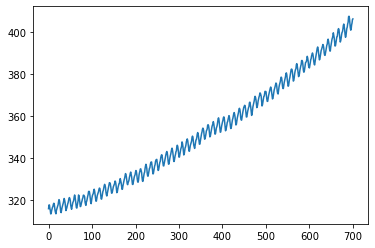

In [17]:
import pandas as pd
Data2=pd.read_csv("GP_CO2.csv")
print(Data2.head())
plt.plot(Data2.average)
plt.show()
train=Data2[:600]
test=Data2[600:]

### Given this data, your goal is to model  the monthly average atmospheric CO2 concentrations using the training data (first 600 months, through 2008) with a GP, then predict for the following years.  Report your kernel and the log-marginal likelihood of the data; let's see who can achieve the best fit!

C:\Users\Jeff\anaconda3\envs\ds\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Jeff\anaconda3\envs\ds\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Jeff\anaconda3\envs\ds\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


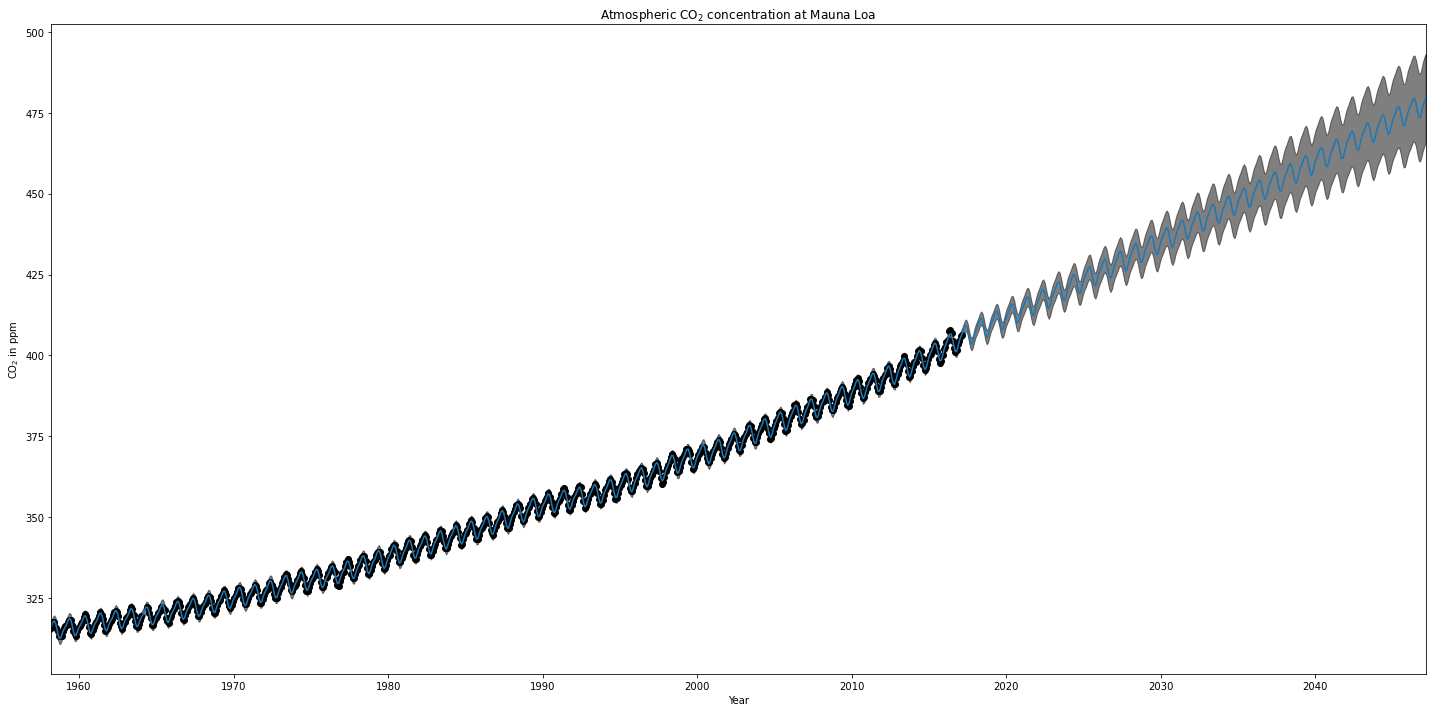

7.03**2 * RBF(length_scale=116) + 0.236**2 * RBF(length_scale=256) * ExpSineSquared(length_scale=2.55, periodicity=1) + 0.382**2 * RationalQuadratic(alpha=0.00172, length_scale=25.6) + 0.00316**2 * RBF(length_scale=1e+05) + WhiteKernel(noise_level=0.001)
1637.7604943427323


In [18]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared

X = np.asarray(Data2.decimal).reshape(-1,1)
y = np.asarray(Data2.average)

# Kernel with optimized parameters
k1 = 100 * RBF(length_scale=100.0)  # long term smooth rising trend
k2 = 100 * RBF(length_scale=100.0) \
    * ExpSineSquared(length_scale=100.0, periodicity=1.0, periodicity_bounds="fixed")  # seasonal component
# medium term irregularities
k3 = 100 * RationalQuadratic(length_scale=10.0)
k4 = 100 * RBF(length_scale=1.0)
k5 = WhiteKernel(noise_level=1.0,
                  noise_level_bounds=(1e-3, 1e3))  # noise terms
kernel = k1 + k2 + k3 + k4 + k5

gp = GaussianProcessRegressor(kernel=kernel,normalize_y=True)
gp.fit(X, y)

X_ = np.linspace(X.min(), X.max() + 30, 1000)[:, np.newaxis]
y_pred, y_std = gp.predict(X_, return_std=True)

# Plot
plt.figure(figsize=(20,10))
plt.scatter(X, y, c='k')
plt.plot(X_, y_pred)
plt.fill_between(X_[:, 0], y_pred - 1.96*y_std, y_pred + 1.96*y_std,
                 alpha=0.5, color='k')
plt.xlim(X_.min(), X_.max())
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.title(r"Atmospheric CO$_2$ concentration at Mauna Loa")
plt.tight_layout()
plt.show()

print(gp.kernel_)
print(gp.log_marginal_likelihood_value_)

C:\Users\Jeff\anaconda3\envs\ds\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__noise_level is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


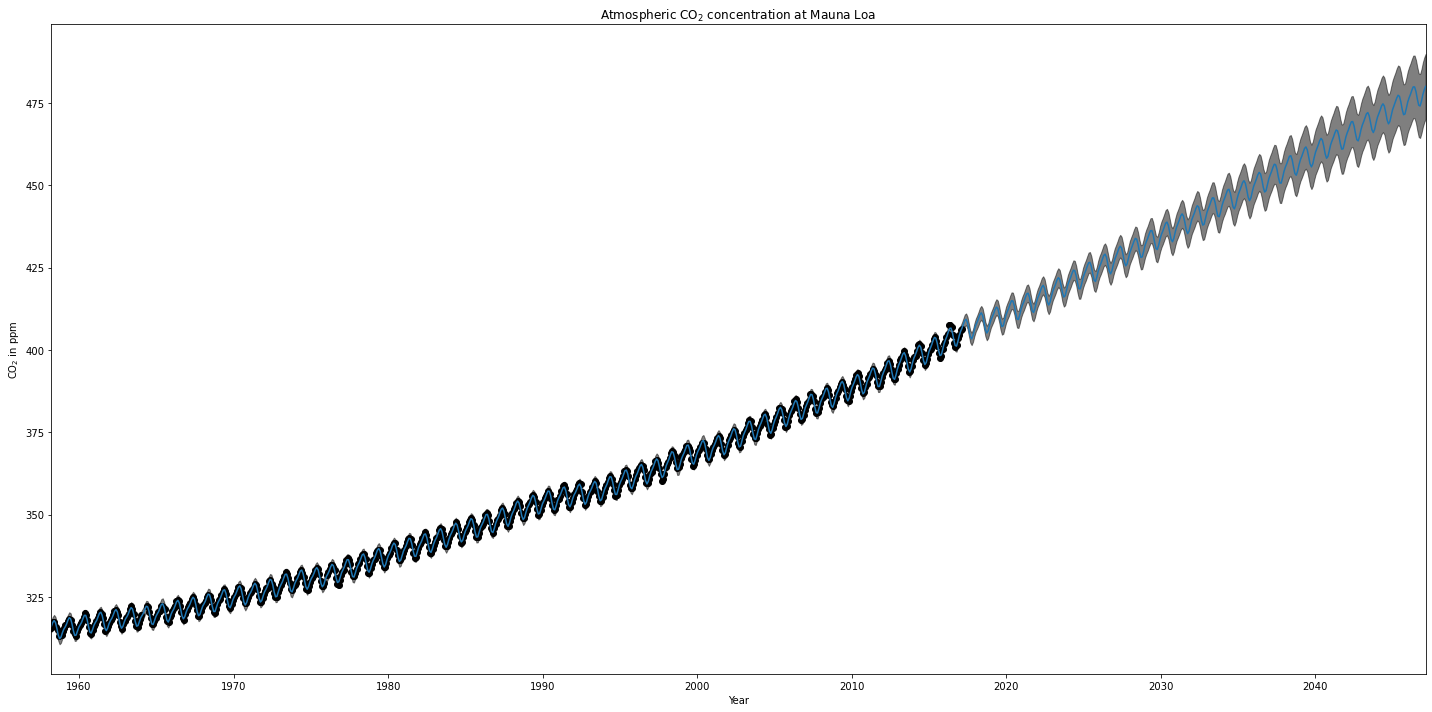

9.06**2 * RBF(length_scale=139) + 0.236**2 * RBF(length_scale=257) * ExpSineSquared(length_scale=2.55, periodicity=1) + 0.342**2 * RationalQuadratic(alpha=122, length_scale=148) + 0.0264**2 * RBF(length_scale=1.5) + WhiteKernel(noise_level=0.001)
1634.1378475127244


In [19]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared

X = np.asarray(Data2.decimal).reshape(-1,1)
y = np.asarray(Data2.average)

# Kernel with optimized parameters
k1 = 10.**2 * RBF(length_scale=50.0)  # long term smooth rising trend
k2 = 50.**2* RBF(length_scale=100.0) \
    * ExpSineSquared(length_scale=1.0, periodicity=1.0,
                     periodicity_bounds="fixed")  # seasonal component
# medium term irregularities
k3 = 10.**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)
k4 = 1.**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.1**2,
                  noise_level_bounds=(1e-3, 1e3))  # noise terms
    
kernel = k1 + k2 + k3 + k4

gp = GaussianProcessRegressor(kernel=kernel,normalize_y=True)
gp.fit(X, y)

X_ = np.linspace(X.min(), X.max() + 30, 1000)[:, np.newaxis]
y_pred, y_std = gp.predict(X_, return_std=True)

# Plot
plt.figure(figsize=(20,10))
plt.scatter(X, y, c='k')
plt.plot(X_, y_pred)
plt.fill_between(X_[:, 0], y_pred - 1.96*y_std, y_pred + 1.96*y_std,
                 alpha=0.5, color='k')
plt.xlim(X_.min(), X_.max())
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.title(r"Atmospheric CO$_2$ concentration at Mauna Loa")
plt.tight_layout()
plt.show()

print(gp.kernel_)
print(gp.log_marginal_likelihood_value_)

# Gaussian Process Classification (Quick Example on Iris Data)

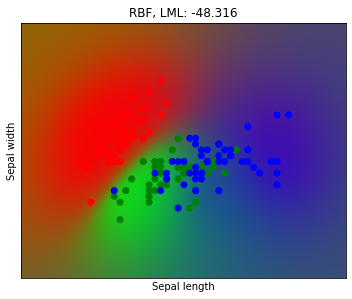

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = np.array(iris.target, dtype=int)

h = .02  # step size in the mesh

kernel = 1.0 * RBF([1.0])
gpc_rbf = GaussianProcessClassifier(kernel=kernel).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.figure(figsize=(5, 5))
    # Plot the predicted probabilities. For that, we will assign a color to
    # each point in the mesh [x_min, m_max]x[y_min, y_max].
plt.subplot(1, 1, 1)
Z = gpc_rbf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape((xx.shape[0], xx.shape[1], 3))
plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=np.array(["r", "g", "b"])[y])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("%s, LML: %.3f" %
          ("RBF", gpc_rbf.log_marginal_likelihood(gpc_rbf.kernel_.theta)))

plt.tight_layout()
plt.show()